In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model,baselinish2,complex_pokemon_model2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
X_train,X_test,Y_train, Y_test = load_data()
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

print (Y_train.dtype)
#lab_data = rgb2lab(Y_train)

mean_val = np.mean(Y_train)
print (np.max(Y_train))
print (np.min(Y_train))
print (mean_val)
#Y_train = Y_train - mean_val
print (np.max(Y_train))
print (np.min(Y_train))
#print (lab_data.shape) 
#lab_data,mean_dat,std_dat = normalise_train(lab_data)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
(78543, 64, 64, 1)
(19636, 64, 64, 1)
(78543, 64, 64, 3)
(19636, 64, 64, 3)
uint8
255
0
112.694584054
255
0


(49, 64, 64, 3)
(64, 64, 3)
(64, 64, 3)


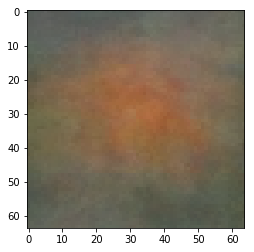

In [22]:
Y_train,mean_image,std_image = normalise_train(Y_train)
print (Y_train.shape)
print (mean_image.shape)
print (std_image.shape)
plt.imshow(mean_image[:,:,:].astype('uint8'))
plt.show()
#X_test = normalise_test(X_test,mean_image,std_image)
#print(X_test.shape)
#print (X_train.shape)

In [5]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 64, 64,1])
Y = tf.placeholder(tf.float32 ,[None , 64,64,3])
is_training = tf.placeholder(tf.bool)

with tf.variable_scope("model") as scope:
    y_out = complex_pokemon_model(X)
    loss = tf.sqrt(tf.nn.l2_loss(y_out-Y))
    optimiser = tf.train.AdamOptimizer(1e-4)
    train_step = optimiser.minimize(loss)

    scope.reuse_variables()
    test_model = complex_pokemon_model(X,False)
    loss_test = tf.sqrt(tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 32
def train_epoch(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:   (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:True}
        losses,_ = sess.run([loss,train_step],feed_dict)
        if(i%5==0):
            print (losses)

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 10
for i in range(num_epochs):
    train_epoch(X_train, Y_train)
    val_result(X_test, Y_test)

    



KeyboardInterrupt: 

In [9]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

#def rgb2gray2(rgb):
 #   a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  #  return a

rand_indices = np.random.choice(400,10)
sample_images = X_train[rand_indices]
samp = Y_train[rand_indices]
print (sample_images.shape)
grayed_sample_images = (sample_images)
print (grayed_sample_images.shape)

feed_dict = {X:grayed_sample_images[:,:,:],Y:samp,is_training:True}
model_generated_images = sess.run([test_model,loss_test],feed_dict)
print (model_generated_images[1])
print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images[0],cmap = plt.get_cmap('gray'))
        plt.subplot(222)
        plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        plt.subplot(223)
        plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        plt.subplot(224)
        plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images[0]);
        plt.subplot(222)
        plt.imshow(images[1])
        plt.subplot(223)
        plt.imshow(images[2])
        plt.subplot(224)
        plt.imshow(images[3])

    plt.show()
    
    
show_images((samp))
#show_images(grayed_sample_images,gray = True)
show_images((model_generated_images[0]) )

    

IndexError: index 168 is out of bounds for axis 0 with size 49

In [6]:
def show_images(images,gray = False):

    
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);

    plt.show()

(78543, 64, 64, 3)
*********************
Batch Number =  0
1.29569
*********************


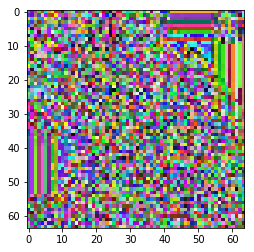

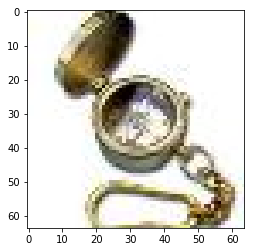

*********************
Batch Number =  50
0.022934
*********************
*********************
Batch Number =  100
0.0162956
*********************


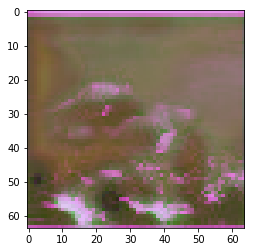

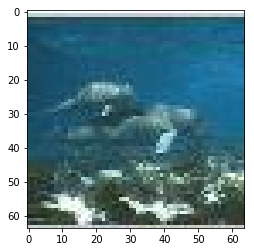

*********************
Batch Number =  150
0.0138892
*********************
*********************
Batch Number =  200
0.0129234
*********************


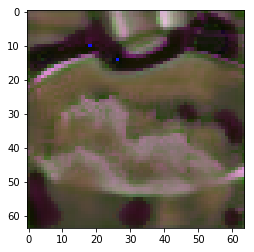

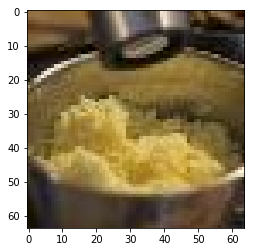

*********************
Batch Number =  250
0.0117792
*********************
*********************
Batch Number =  300
0.0130348
*********************


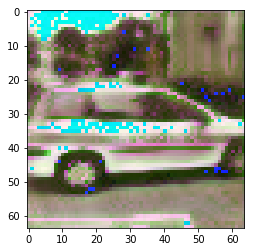

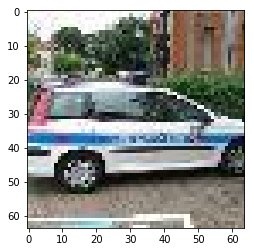

*********************
Batch Number =  350
0.0148286
*********************
*********************
Batch Number =  400
0.0121268
*********************


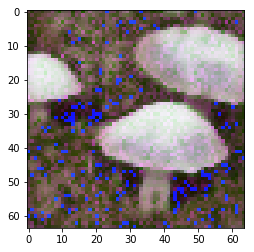

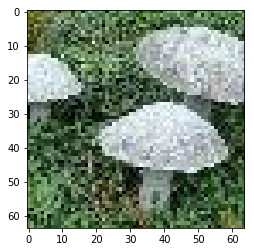

*********************
Batch Number =  450
0.0146013
*********************
*********************
Batch Number =  500
0.011882
*********************


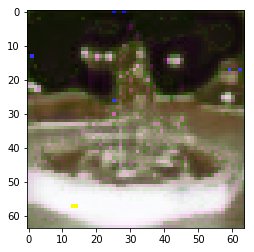

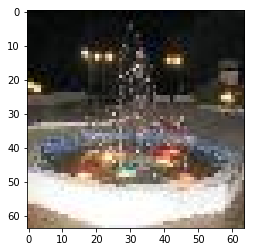

*********************
Batch Number =  550
0.0108708
*********************
*********************
Batch Number =  600
0.00993534
*********************


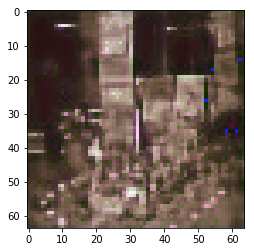

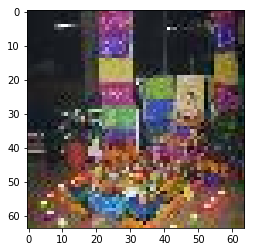

*********************
Batch Number =  650
0.0101102
*********************
*********************
Batch Number =  700
0.0107798
*********************


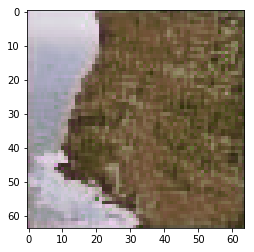

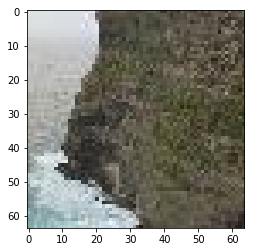

*********************
Batch Number =  750
0.014867
*********************
*********************
Batch Number =  800
0.00963709
*********************


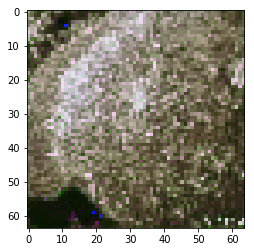

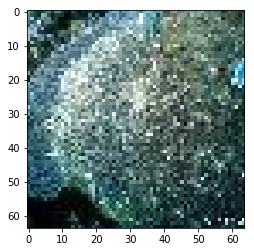

*********************
Batch Number =  850
0.0109372
*********************
*********************
Batch Number =  900
0.00772737
*********************


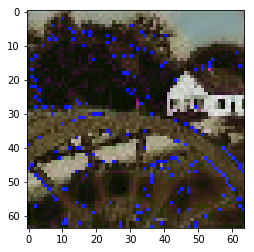

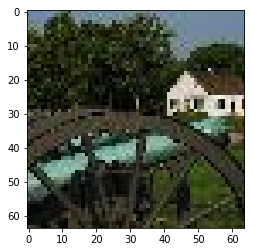

*********************
Batch Number =  950
0.00894864
*********************
*********************
Batch Number =  1000
0.0109672
*********************


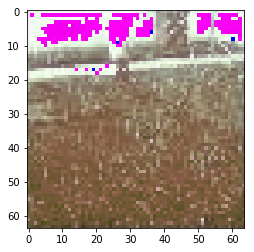

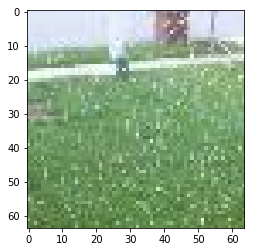

*********************
Batch Number =  1050
0.00973073
*********************
*********************
Batch Number =  1100
0.00945321
*********************


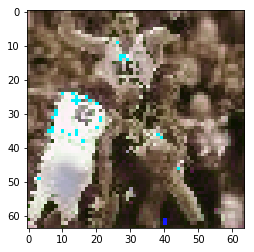

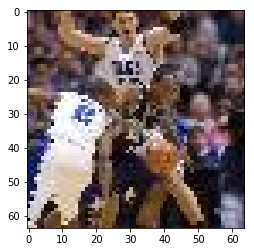

*********************
Batch Number =  1150
0.0121657
*********************
*********************
Batch Number =  1200
0.00692633
*********************


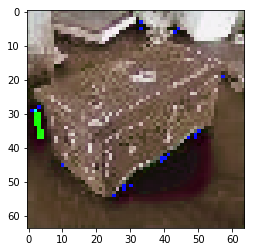

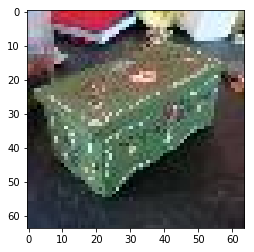

*********************
Batch Number =  1250
0.0138917
*********************
*********************
Batch Number =  1300
0.0123285
*********************


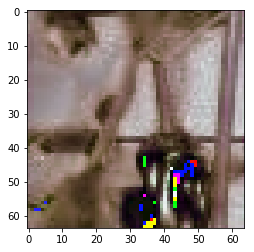

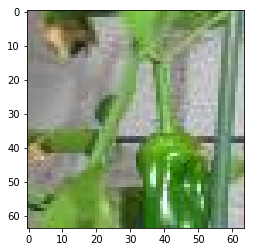

*********************
Batch Number =  1350
0.00840539
*********************
*********************
Batch Number =  1400
0.0118654
*********************


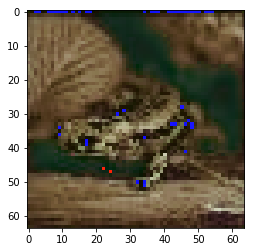

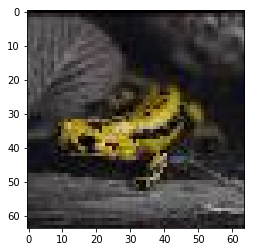

*********************
Batch Number =  1450
0.0100478
*********************
*********************
Batch Number =  1500
0.0115582
*********************


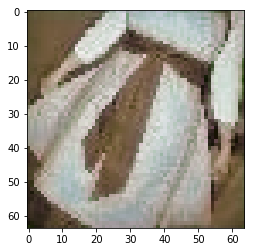

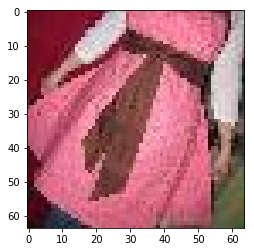

*********************
Batch Number =  1550
0.0117858
*********************
*********************
Batch Number =  1600
0.0153982
*********************


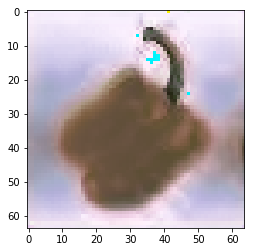

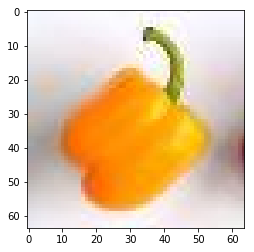

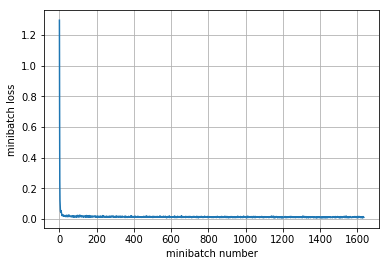

*********************
Next Epoch 0
*********************
0.272525
0.284826
0.273533
0.278736
0.28086
0.296588
0.263551
0.279062
0.268348
0.272941
0.293956
0.272351
0.255138
0.274528
*********************
Batch Number =  0
0.00994884
*********************


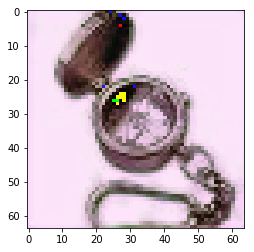

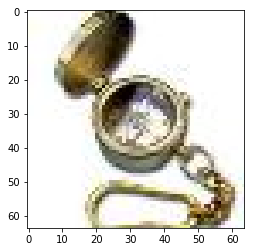

*********************
Batch Number =  50
0.0174701
*********************
*********************
Batch Number =  100
0.0117739
*********************


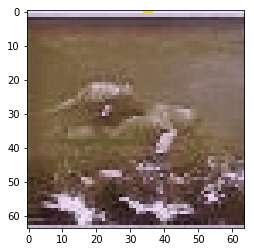

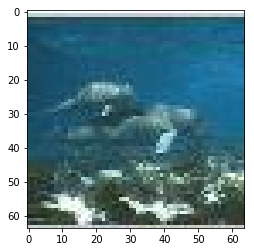

*********************
Batch Number =  150
0.00927658
*********************
*********************
Batch Number =  200
0.00910398
*********************


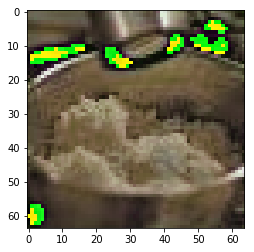

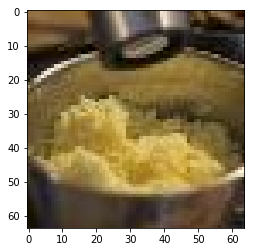

*********************
Batch Number =  250
0.00809549
*********************
*********************
Batch Number =  300
0.00971257
*********************


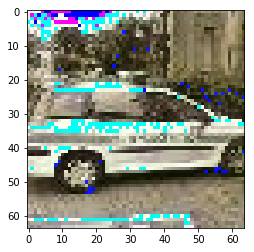

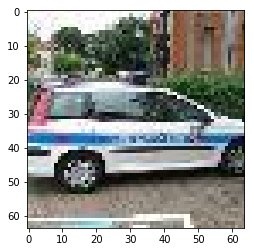

*********************
Batch Number =  350
0.0118083
*********************
*********************
Batch Number =  400
0.00850498
*********************


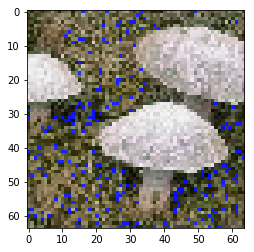

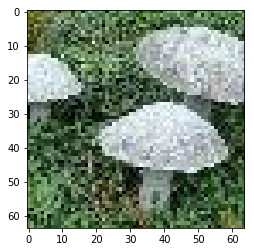

*********************
Batch Number =  450
0.0116767
*********************
*********************
Batch Number =  500
0.00926312
*********************


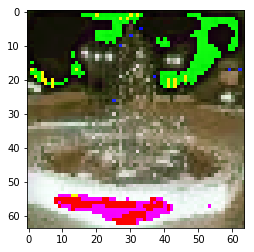

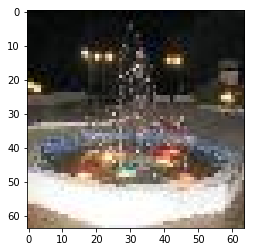

*********************
Batch Number =  550
0.00905901
*********************
*********************
Batch Number =  600
0.00820225
*********************


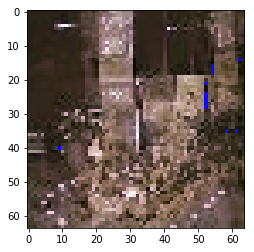

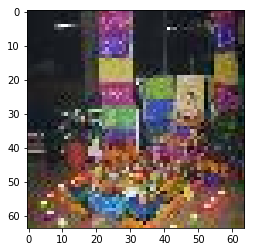

*********************
Batch Number =  650
0.00822352
*********************
*********************
Batch Number =  700
0.0093312
*********************


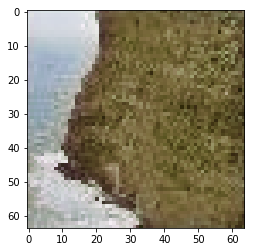

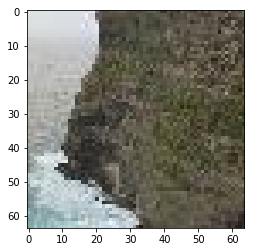

*********************
Batch Number =  750
0.0136155
*********************
*********************
Batch Number =  800
0.00908093
*********************


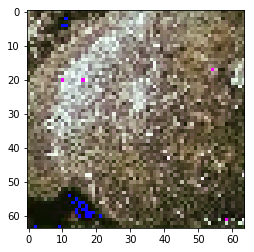

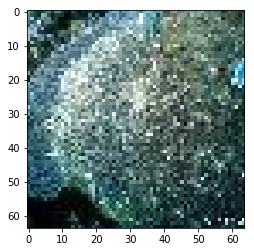

*********************
Batch Number =  850
0.0104603
*********************
*********************
Batch Number =  900
0.00746086
*********************


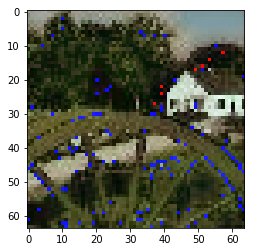

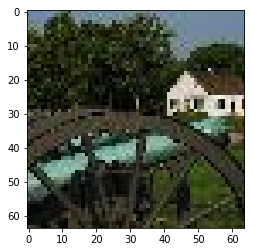

*********************
Batch Number =  950
0.00862796
*********************
*********************
Batch Number =  1000
0.0100208
*********************


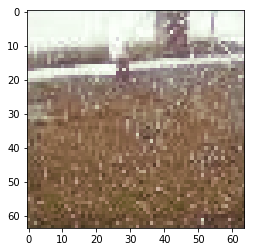

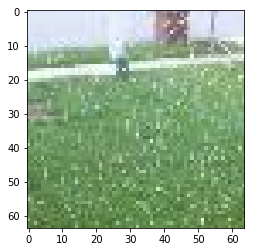

*********************
Batch Number =  1050
0.0097239
*********************
*********************
Batch Number =  1100
0.00888994
*********************


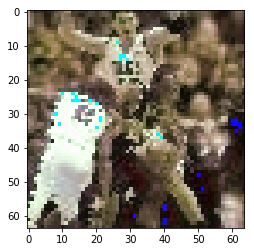

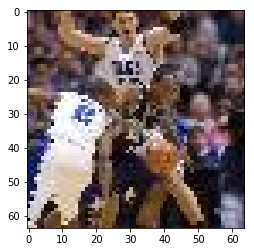

*********************
Batch Number =  1150
0.0116725
*********************
*********************
Batch Number =  1200
0.00690534
*********************


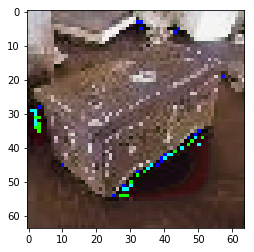

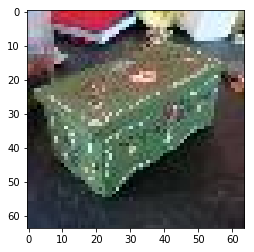

*********************
Batch Number =  1250
0.0132013
*********************
*********************
Batch Number =  1300
0.0118839
*********************


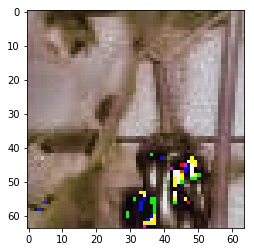

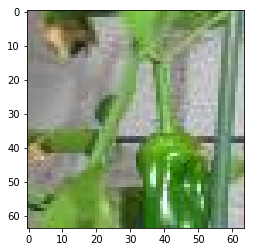

*********************
Batch Number =  1350
0.0080429
*********************
*********************
Batch Number =  1400
0.0114727
*********************


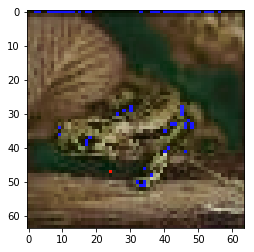

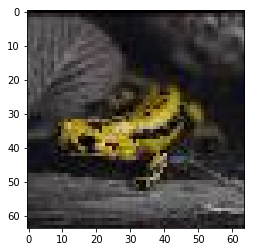

*********************
Batch Number =  1450
0.00950592
*********************
*********************
Batch Number =  1500
0.0110426
*********************


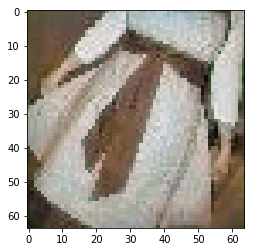

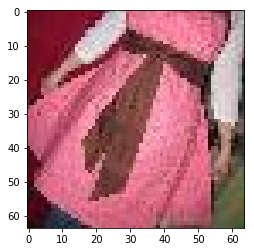

*********************
Batch Number =  1550
0.0112665
*********************
*********************
Batch Number =  1600
0.0148056
*********************


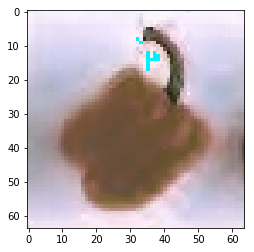

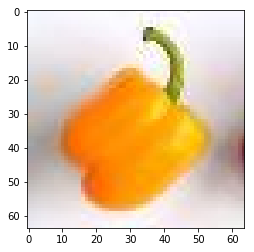

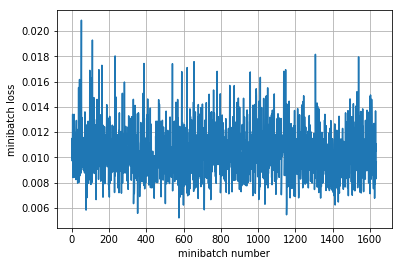

*********************
Next Epoch 1
*********************
0.576547
0.599155
0.589134
0.613544
0.593701
0.623611
0.593258
0.583601
0.58881
0.596022
0.644611
0.62174
0.570081
0.606553
*********************
Batch Number =  0
0.00854257
*********************


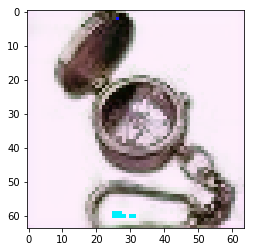

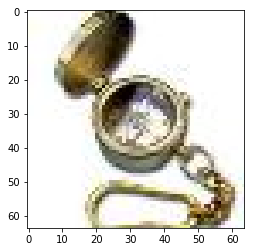

*********************
Batch Number =  50
0.0166532
*********************
*********************
Batch Number =  100
0.0109936
*********************


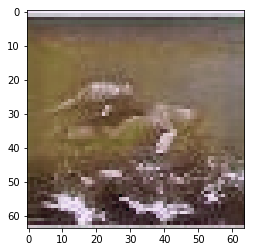

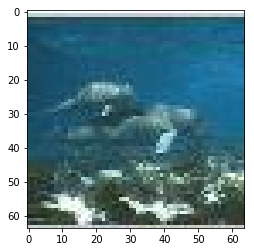

*********************
Batch Number =  150
0.00896747
*********************
*********************
Batch Number =  200
0.00873709
*********************


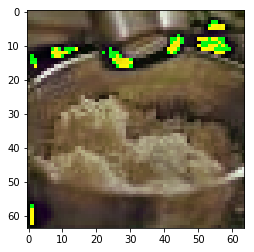

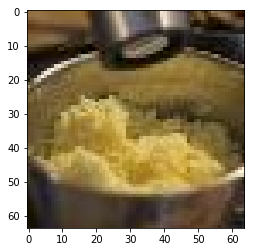

*********************
Batch Number =  250
0.00813121
*********************
*********************
Batch Number =  300
0.00904923
*********************


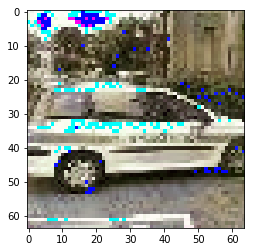

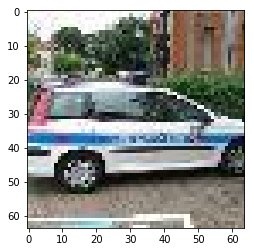

*********************
Batch Number =  350
0.0114657
*********************
*********************
Batch Number =  400
0.00828371
*********************


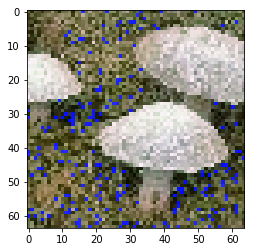

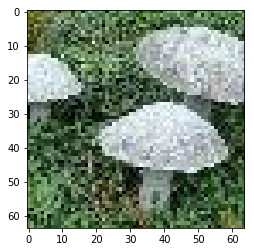

*********************
Batch Number =  450
0.0113754
*********************
*********************
Batch Number =  500
0.00903538
*********************


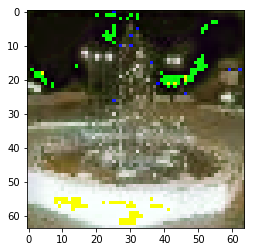

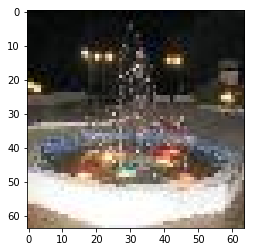

*********************
Batch Number =  550
0.00861762
*********************
*********************
Batch Number =  600
0.00798326
*********************


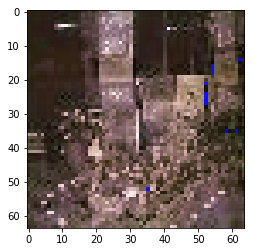

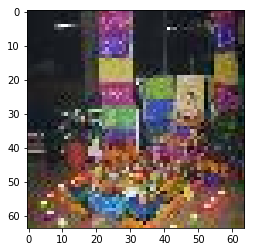

*********************
Batch Number =  650
0.00803756
*********************
*********************
Batch Number =  700
0.0093154
*********************


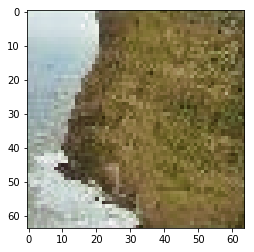

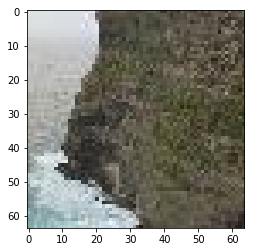

*********************
Batch Number =  750
0.0127936
*********************
*********************
Batch Number =  800
0.00860724
*********************


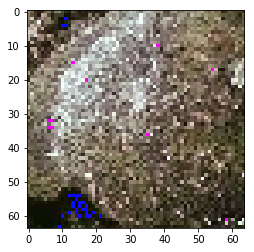

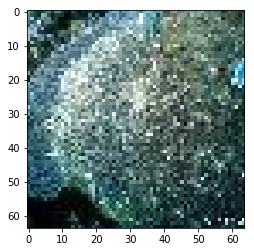

*********************
Batch Number =  850
0.0103387
*********************
*********************
Batch Number =  900
0.00748287
*********************


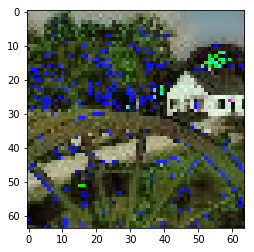

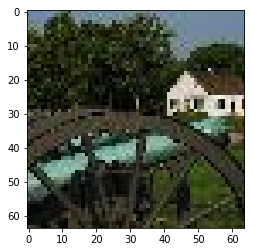

*********************
Batch Number =  950
0.00811513
*********************
*********************
Batch Number =  1000
0.00974015
*********************


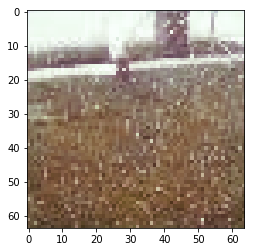

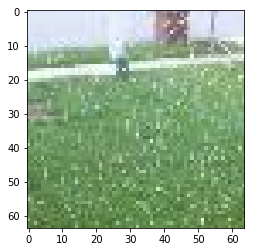

*********************
Batch Number =  1050
0.00980986
*********************
*********************
Batch Number =  1100
0.00847414
*********************


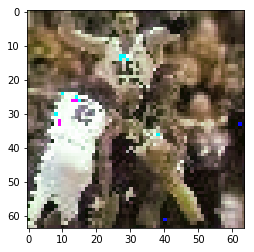

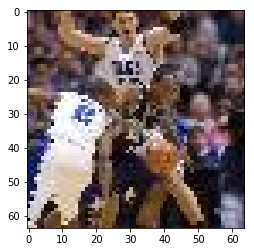

*********************
Batch Number =  1150
0.0114117
*********************
*********************
Batch Number =  1200
0.00649626
*********************


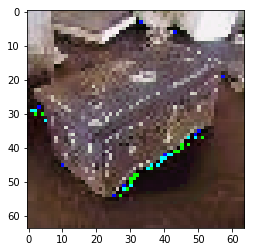

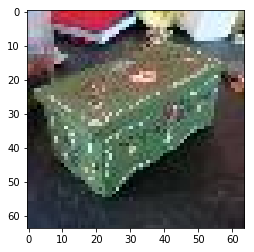

*********************
Batch Number =  1250
0.0126645
*********************
*********************
Batch Number =  1300
0.011589
*********************


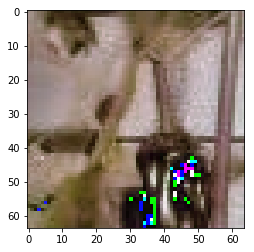

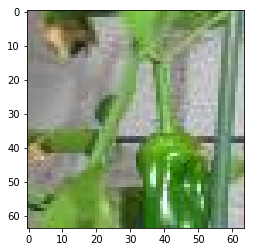

*********************
Batch Number =  1350
0.0077101
*********************
*********************
Batch Number =  1400
0.0113076
*********************


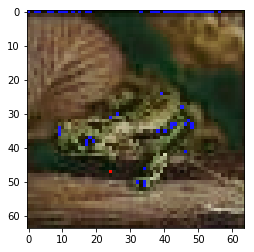

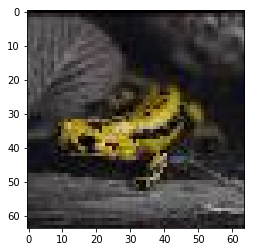

*********************
Batch Number =  1450
0.00929886
*********************
*********************
Batch Number =  1500
0.0106839
*********************


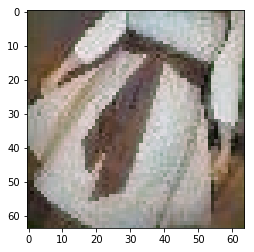

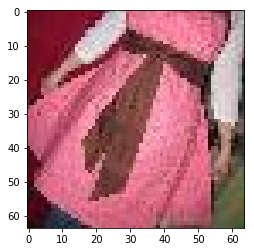

*********************
Batch Number =  1550
0.010859
*********************
*********************
Batch Number =  1600
0.0141426
*********************


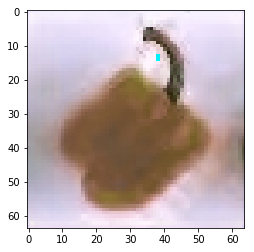

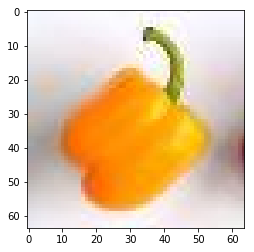

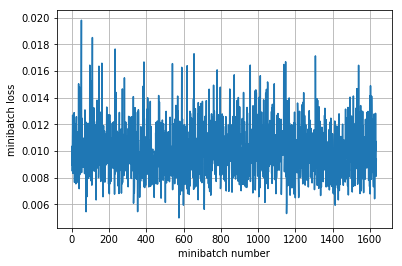

*********************
Next Epoch 2
*********************
1.0633
1.17069
1.07495
1.15194
1.15354
1.18845
1.12844
1.09657
1.12261
1.10322
1.22621
1.18432
1.10361
1.14694
*********************
Batch Number =  0
0.00807392
*********************


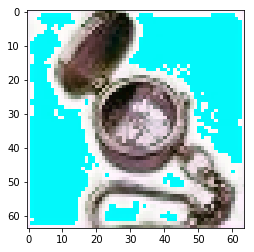

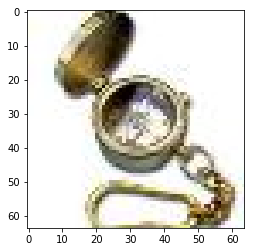

*********************
Batch Number =  50
0.0161112
*********************
*********************
Batch Number =  100
0.0106331
*********************


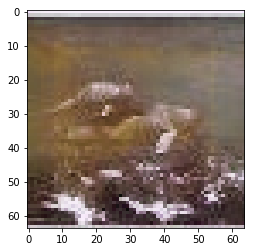

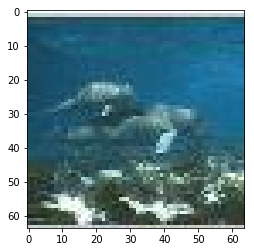

*********************
Batch Number =  150
0.00845932
*********************
*********************
Batch Number =  200
0.00835859
*********************


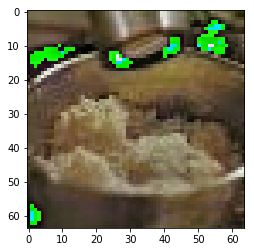

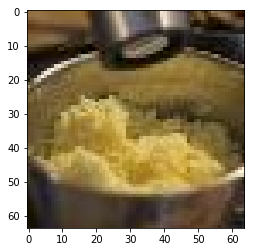

*********************
Batch Number =  250
0.00805311
*********************
*********************
Batch Number =  300
0.0086575
*********************


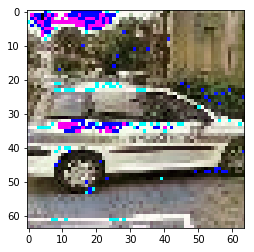

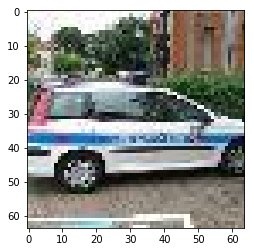

*********************
Batch Number =  350
0.0114007
*********************
*********************
Batch Number =  400
0.00824195
*********************


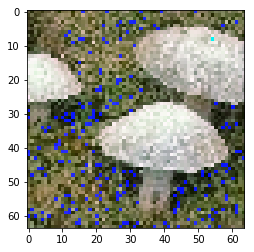

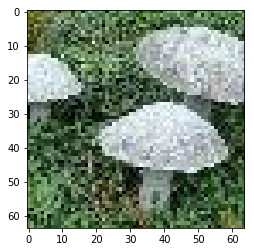

*********************
Batch Number =  450
0.010902
*********************
*********************
Batch Number =  500
0.00878908
*********************


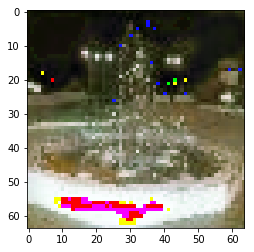

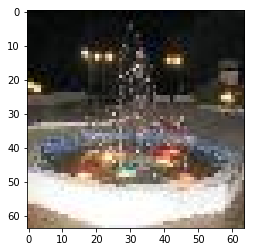

*********************
Batch Number =  550
0.0083666
*********************
*********************
Batch Number =  600
0.00769478
*********************


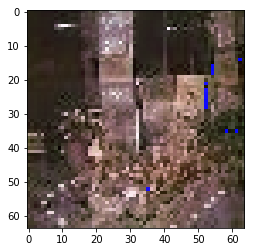

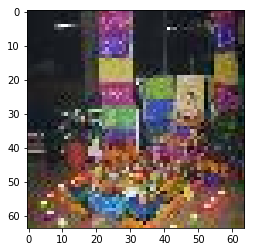

*********************
Batch Number =  650
0.00777013
*********************
*********************
Batch Number =  700
0.00901172
*********************


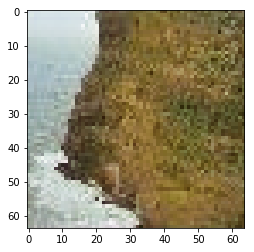

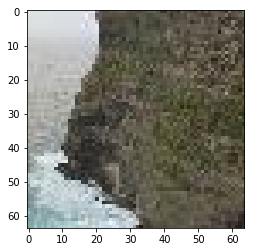

*********************
Batch Number =  750
0.0124253
*********************
*********************
Batch Number =  800
0.00813204
*********************


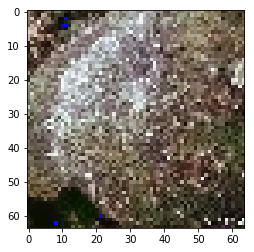

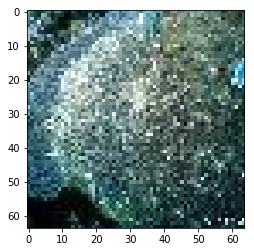

*********************
Batch Number =  850
0.0100658
*********************
*********************
Batch Number =  900
0.00719353
*********************


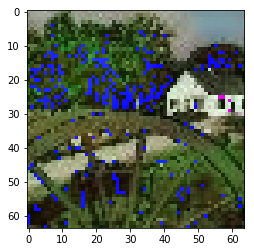

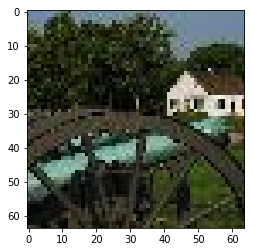

*********************
Batch Number =  950
0.00801048
*********************
*********************
Batch Number =  1000
0.00906981
*********************


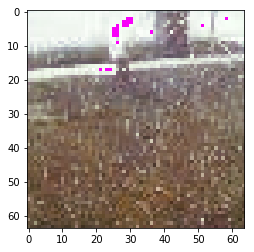

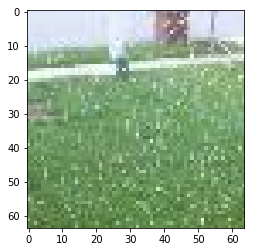

*********************
Batch Number =  1050
0.0095064
*********************
*********************
Batch Number =  1100
0.0079903
*********************


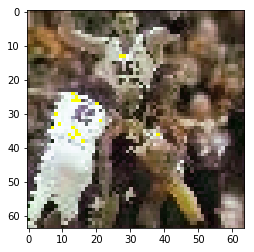

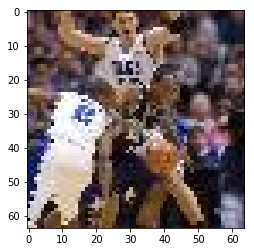

*********************
Batch Number =  1150
0.0112482
*********************
*********************
Batch Number =  1200
0.00628239
*********************


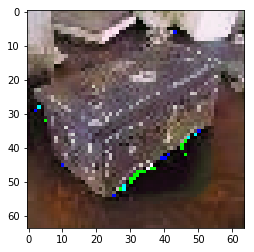

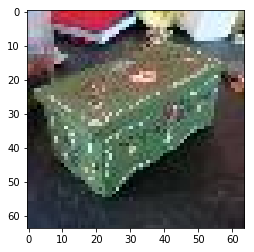

*********************
Batch Number =  1250
0.0118661
*********************
*********************
Batch Number =  1300
0.0111103
*********************


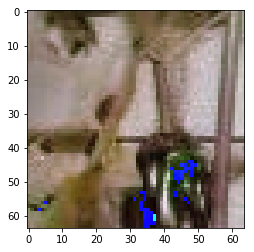

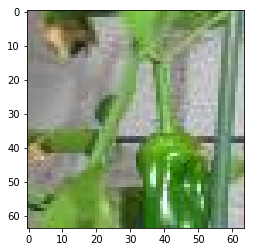

*********************
Batch Number =  1350
0.00704669
*********************
*********************
Batch Number =  1400
0.0107726
*********************


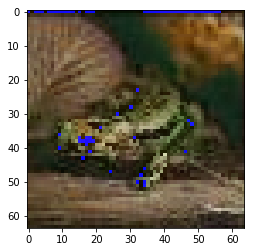

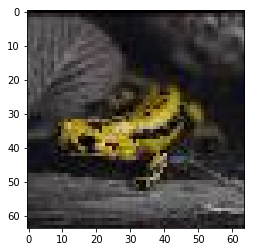

*********************
Batch Number =  1450
0.00904837
*********************
*********************
Batch Number =  1500
0.010045
*********************


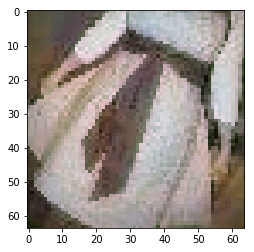

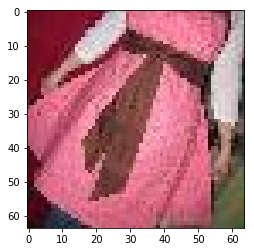

*********************
Batch Number =  1550
0.0104626
*********************
*********************
Batch Number =  1600
0.0133456
*********************


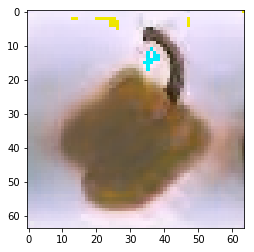

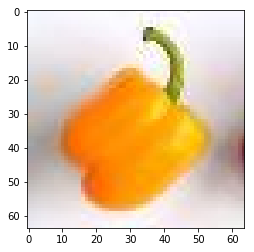

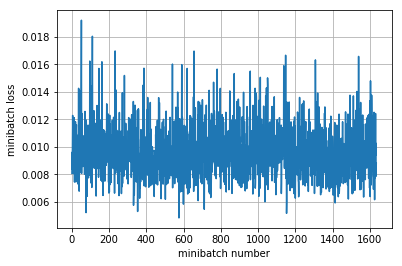

*********************
Next Epoch 3
*********************
3.46299


KeyboardInterrupt: 

In [12]:
tf.reset_default_graph()

#X = tf.placeholder(tf.float32, [None, 64, 64,1])

Y = tf.placeholder(tf.uint8 ,[None , 64,64,3])

is_training = tf.placeholder(tf.bool)

#X_train = lab_data[...,0:1]
#Y_train = lab_data[...,1:3]
#print (X_train.shape)
print (Y_train.shape)

with tf.variable_scope("model") as scope:
    #y_out = simpler_model(X)
    #y_out = complex_pokemon_model(X,True)
    #hsv_out,rgb_out,hsv_in,rgb_in = baselinish2(Y,is_training)
    hsv_out,rgb_out,hsv_in,rgb_in = complex_pokemon_model2(Y,is_training)
    loss = tf.reduce_mean(tf.square(rgb_out-rgb_in))
    
    #### A different loss function
    #tf.concat
    #lab2rgb(original_data[0,:,:,:]*std_dat + mean_dat )
    global_step = tf.Variable(0, trainable=False)
    starter_learning_rate = 0.01
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           100, 0.98, staircase=True)
# Passing global_step to minimize() will increment it at each step.
    train_step = (tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step))
    #optimiser = tf.train.AdamOptimizer(1e-3)
    #train_step = optimiser.minimize(loss)

    #scope.reuse_variables()
    #test_model = simpler_model(X,False)
    #test_model = complex_pokemon_model(X,False)
    #test_model = baselinish()
    #loss_test = (tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 48
epoch_number = 0
def train_epoch(target):
    all_losses = []
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: (target[i*batch_size:batch_size*i+batch_size]),is_training:True}
        losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
        all_losses.append(losses)
        #if(i%5==0):
        if(i%50 == 0):
            print ("*********************")
            print ("Batch Number = ",i)
            print (losses)
            print ("*********************")
        if(i%100 == 0):
            show_images(rgb_o[4])
            show_images(rgb_i[4])
    plt.plot(all_losses)
    plt.grid(True)
    #plt.title('Epoch {} Loss'.format(e+1))
    plt.xlabel('minibatch number')
    plt.ylabel('minibatch loss')
    plt.show()

  

def val_result(target):
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]),is_training:False}
        losses,rgb_o,rgb_i = sess.run([loss,rgb_out,rgb_in],feed_dict)
        if(i%30 ==0):
            print (losses)
            
saver = tf.train.Saver()
num_epochs = 30
for i in range(num_epochs):
    epoch_number = i
    saver.save(sess,'new_model')
    train_epoch(Y_train)
    print ("*********************")
    print ("Next Epoch",i)
    print ("*********************")
    val_result(Y_test)
    
    #val_result(X_test, Y_test)

    


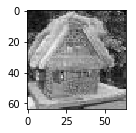

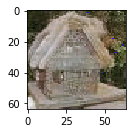

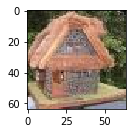

In [25]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#def rgb2gray2(rgb):
 #   a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  #  return a

rand_indices = np.random.choice(10000,48)
#sample_images = X_train[rand_indices]
samp = Y_train[rand_indices]
#original_data = lab_data[rand_indices]
#sample_images = original_data[:,:,:,0:1]
#print (np.min(original_data[:,:,:,1:2]))
#print (np.max(original_data[:,:,:,1:2]))
#print (sample_images.shape)
#print (samp.shape)
#print (original_data.shape)

feed_dict = {Y:samp,is_training:True}
losses,rgb_o,rgb_i = sess.run([loss,rgb_out,rgb_in],feed_dict)
show_images(rgb2gray(rgb_i[0]),gray = True)
show_images(rgb_o[0])
show_images(rgb_i[0])

#model_generated_images = sess.run([y_out,loss],feed_dict)
#print (model_generated_images[1])
#print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images,cmap = plt.get_cmap('gray'))
        #plt.subplot(222)
        #plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        #plt.subplot(223)
        #plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        #plt.subplot(224)
        #plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images);
        #plt.subplot(222)
        #plt.imshow(images[1])
        #plt.subplot(223)
        #plt.imshow(images[2])
        #plt.subplot(224)
        #plt.imshow(images[3])

    plt.show()
    
#show_images(lab2rgb(original_data[0,:,:,:]  ) )
#show_images((samp[0]).astype('uint8'))
#original_data[...,1:3] = model_generated_images[0]
#show_images(original_data[0,:,:,0],gray = True)
#show_images(lab2rgb(original_data[0,:,:,:]*std_dat +mean_dat))
#show_images((model_generated_images[0][0] ).astype('uint8'))
    